# Project Unsupervised Learning

# Importing required Libraries

In [1]:
##importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

# Reading the dataset and displaying the first 10 records of the dataset.

In [2]:
df = pd.read_csv('vehicle-1.csv')
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


# Checking the Shape and Type of the Data

In [3]:
rows=len(df)
columns = len(df.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
df.info() #Displays the type of the columns that exist in the dataset

The dataset contains 846 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844

All the dependent variables are numeric in nature. 

However, there are few missing (NaN) values. Let us replace these missing values with the median later.

# Five Number Summary for the Numerical variables

In [4]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


- Tough to comment on the correlation between the variables.
- Also, it is difficult to interpret these variables.

- Some of the variables have outliers. However, the presence of outliers wouldn't harm us as we are resorting to use SVM which is a non parametric method.

## Let us use correlation heatmap to understand the presence of multi-collinearity.

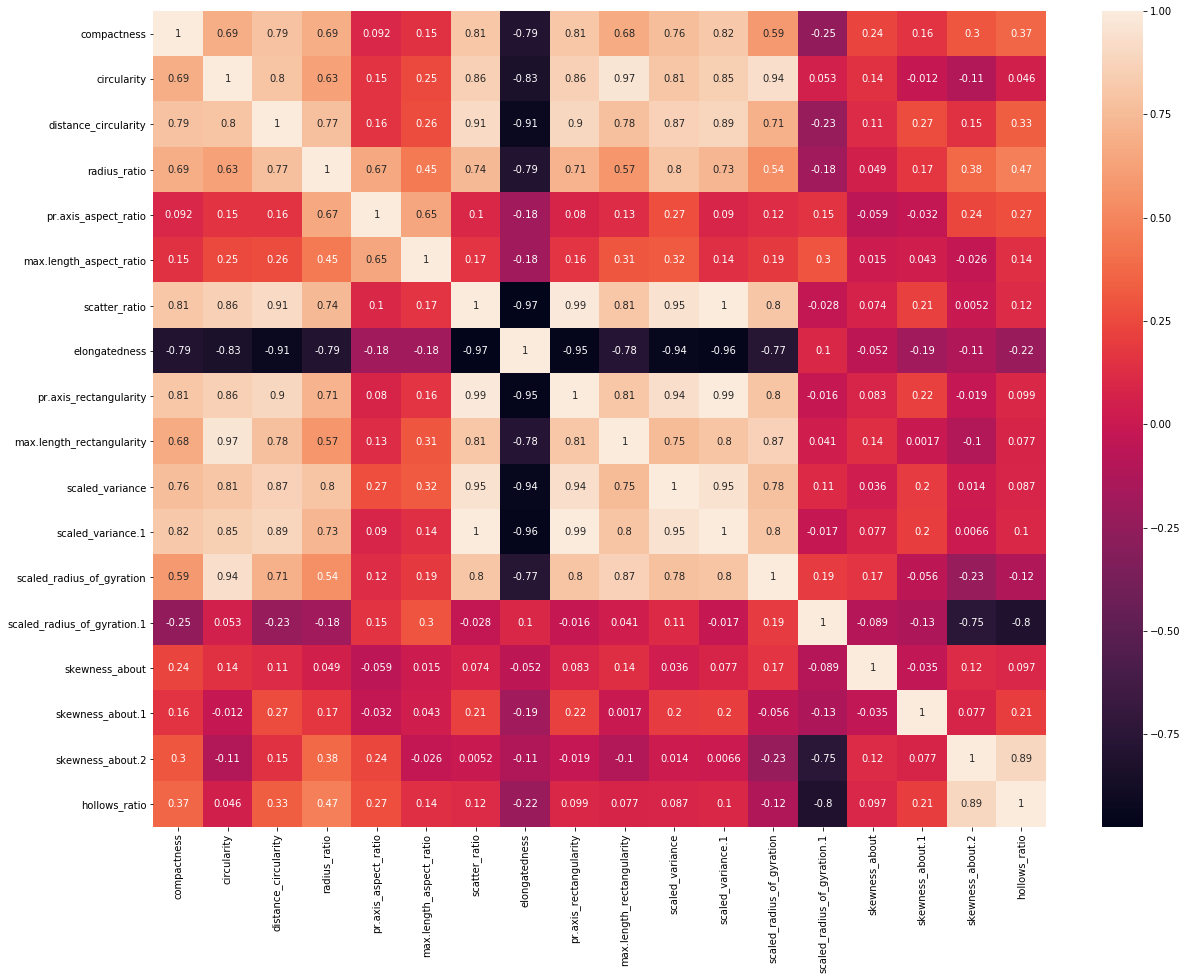

In [5]:
corrMatrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True);

- There are quite a few columns which are both positively and negatively correlated with each other. 
  Hence, we can go for PCA to reduce the dimensionality.

- I can choose to drop some columns. However, i am deciding against it as i do not want to lose out on any information. 
- Moreover, my main focus is on getting the prediction right rather than the interpreting these variables.

## Summary of the missing values in each column

In [6]:
print(df.isnull().sum().to_frame('nulls'))

                             nulls
compactness                      0
circularity                      5
distance_circularity             4
radius_ratio                     6
pr.axis_aspect_ratio             2
max.length_aspect_ratio          0
scatter_ratio                    1
elongatedness                    1
pr.axis_rectangularity           3
max.length_rectangularity        0
scaled_variance                  3
scaled_variance.1                2
scaled_radius_of_gyration        2
scaled_radius_of_gyration.1      4
skewness_about                   6
skewness_about.1                 1
skewness_about.2                 1
hollows_ratio                    0
class                            0


## Getting the counts of each class of the vehicles

car    429
bus    218
van    199
Name: class, dtype: int64


Text(0.5, 1.0, 'Distribution of Classes')

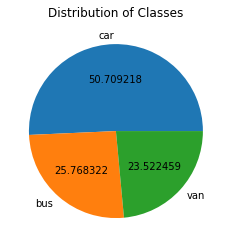

In [7]:
labels= pd.value_counts(df['class']).index
values= pd.value_counts(df['class']).values
print(pd.value_counts(df['class']))
plt.pie(values, labels=labels,autopct='%f');
plt.title("Distribution of Classes")


## Let us impute the missing values

In [8]:
numeric_cols = df.drop('class', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
class_name = pd.DataFrame(df[['class']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
df = numeric_cols.join(class_name)   # Recreating mpg_df by combining numerical columns with car names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [9]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## We can see that none of the columns contain Nulls as missing values have been treated.

In [10]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


## Adding another column for class

In [11]:
dict_values ={'van':0,'car':1,'bus':2}
type(dict_values)
df['class_new'] = df['class'].map(dict_values)
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_new
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van,0
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car,1


In [12]:
df.drop(['class'],axis=1,inplace=True)

In [13]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_new
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,0
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,1


In [14]:
df.info()
df['class_new'] = df['class_new'].astype('int').astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

# Separating the independent variables and scaling these variables

In [15]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = df.iloc[:,0:18].values
y = df.iloc[:,18].values


In [16]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)


# Splitting the Train and Test in 7:3 ratio

In [17]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train_sd, X_test_sd, y_train, y_test = train_test_split(X_sd,y, test_size = 0.3, random_state = 10)

Checking the records in Train and Test datasets

In [18]:
print('The number of rows in Training dataset is ', len(X_train_sd))
print('The number of rows in Test dataset is :',len(X_test_sd))

The number of rows in Training dataset is  592
The number of rows in Test dataset is : 254


# Let's build Multi- Class Linear SVM Classifier 

In [19]:
# loading library
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svm=svc_model.fit(X_train_sd, y_train)

prediction = svc_model .predict(X_test_sd)

# check the accuracy on the testing set
print('The accuracy of the SVM model is ',svc_model.score(X_test_sd, y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


The accuracy of the SVM model is  94.09448818897637
Confusion Matrix:
 [[ 58   8   2]
 [  0 114   2]
 [  0   3  67]]


- We are checking the accuracy alone as we are interested in getting the prediction right irrespective of its value.
- It seems to be a decent enough model with 94% accuracy.

## K-fold cross-validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(svm,X_sd, y, cv=kfold)
mean_accuracy=scores.mean()*100
print("Accuracy: %0.2f" %mean_accuracy )

C:\Users\Maneesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 92.79


K Fold Validation has resulted in average 93% accuracy. This alludes that SVM is working well so far.

# Let us look to reduce dimensions by feature extraction using PCA

In [21]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=7)

In [22]:
X_trans = pca_model.fit_transform(X_sd)
X_train_trans, X_test_trans, y_train, y_test = train_test_split(X_trans,y, test_size = 0.3, random_state = 10)

print("Eigen Values ",pca_model.explained_variance_)

print("Eigen Vectors ",pca_model.components_)

print(pca_model.explained_variance_ratio_)


Eigen Values  [9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012]
Eigen Vectors  [[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743

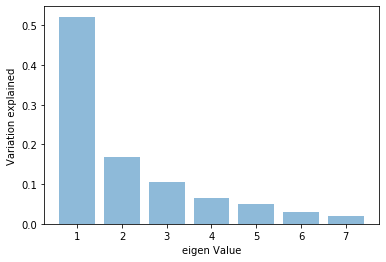

In [23]:
plt.bar(list(range(1,8)),pca_model.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

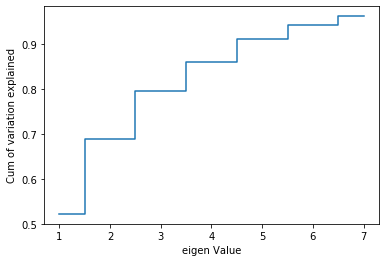

[0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549]


In [24]:
plt.step(list(range(1,8)),np.cumsum(pca_model.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()
print(np.cumsum(pca_model.explained_variance_ratio_))

The seven components are able to explain the 95% variance. Hence, we will use 7 components.

# Let us try to fit the linear SVM model using the Principal components and check the accuracy

In [25]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svm=svc_model.fit(X_train_sd, y_train)
prediction = svc_model .predict(X_test_sd)

print('The accuracy of the SVM model before PCA is ',svc_model.score(X_test_sd, y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

svm=svc_model.fit(X_train_trans, y_train)
prediction = svc_model.predict(X_test_trans)

print('The accuracy of the SVM model after PCA is ',svc_model.score(X_test_trans, y_test)*100)
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


The accuracy of the SVM model before PCA is  94.09448818897637
Confusion Matrix:
 [[ 58   8   2]
 [  0 114   2]
 [  0   3  67]]
The accuracy of the SVM model after PCA is  81.10236220472441
Confusion Matrix:
 [[56 11  3]
 [ 0 99 17]
 [ 2 15 51]]


# The accuracy of SVM after PCA has decreased from 94% to 81%. 

# Let us check whether this was the case with this test data or the entire data by using K fold cross validation.

In [208]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(svm,X_trans, y, cv=kfold)
mean_accuracy=scores.mean()*100
print("Accuracy: %0.2f" %mean_accuracy )

Accuracy: 81.56


C:\Users\Maneesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# The average accuracy of the model after PCA has taken a hit as it dipped down from 93% to 82%.

# Hence, it would be reasonable to stick with the SVM Model without the principal compoonents.